<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/20230328.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/data/실습에 사용되는 파일2-20230314/iris.csv"); df.index.name='record'
cols=['sepal length in cm',
      'sepal width in cm',
      'petal length in cm',
      'petal width in cm',]

In [3]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(df[cols])
print(selector.variances_)

[0.68112222 0.18675067 3.09242489 0.57853156]


In [4]:
selector.set_params(threshold=0.6)
out_sel = selector.fit_transform(df[cols])
print(selector.get_support())

[ True False  True False]


In [5]:
df_feat = df[cols]
df_sel = df_feat.iloc[:, selector.get_support()]
df_sel = pd.concat([df_sel, df[['species']]], axis = 1)
print(df_sel.head())

        sepal length in cm  petal length in cm species
record                                                
0                      5.1                 1.4  setosa
1                      4.9                 1.4  setosa
2                      4.7                 1.3  setosa
3                      4.6                 1.5  setosa
4                      5.0                 1.4  setosa


In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV']=housing.target
df.index.name='record'
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
record,,,,,,,,,
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


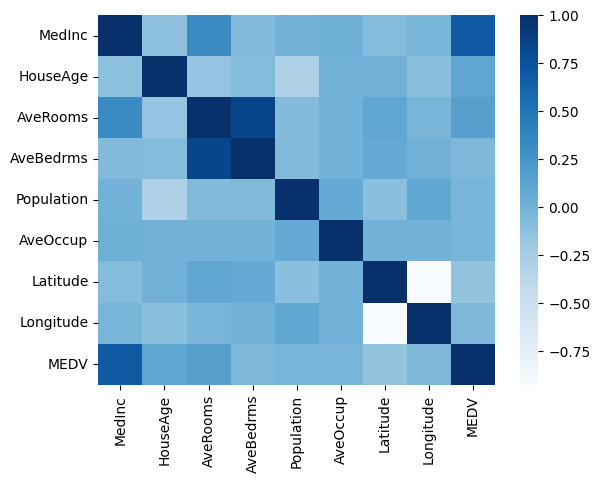

In [10]:
cor=df.corr()
import seaborn as sns
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)
plt.show()

In [11]:
cor_target = abs(cor['MEDV'])
print(cor_target)

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms     0.046701
Population    0.024650
AveOccup      0.023737
Latitude      0.144160
Longitude     0.045967
MEDV          1.000000
Name: MEDV, dtype: float64


In [12]:
selected_cols = cor_target[cor_target > 0.6]
print("selected columns, correlation with target > 0.6")
print(selected_cols)
df_sel = df[selected_cols.index]
print(df_sel.head())

selected columns, correlation with target > 0.6
MedInc    0.688075
MEDV      1.000000
Name: MEDV, dtype: float64
        MedInc   MEDV
record               
0       8.3252  4.526
1       8.3014  3.585
2       7.2574  3.521
3       5.6431  3.413
4       3.8462  3.422


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/data/실습에 사용되는 파일2-20230314/iris.csv"); df.index.name='record'
cols = ['sepal length in cm', 
        'sepal width in cm', 
        'petal length in cm', 
        'petal width in cm',]

In [14]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
X=df[cols]
y=df['species']

In [15]:
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(X,y)
print(cols)
print(rfe.ranking_)

['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']
[3 2 1 1]


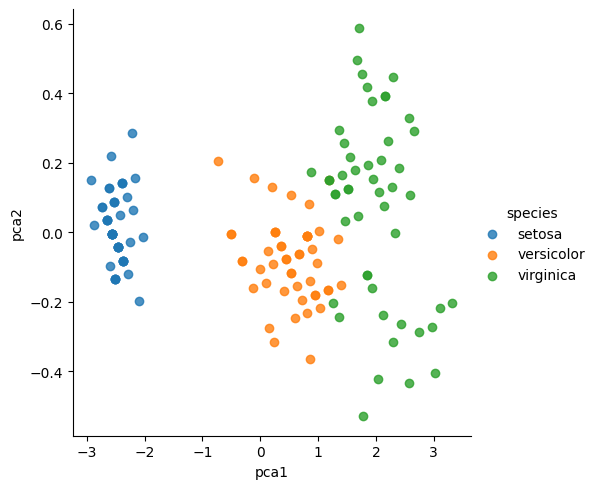

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df[['petal length in cm',
                                'petal width in cm',]])
df_pca = pd.DataFrame(data=out_pca, columns = ['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df[['species']]], axis=1)
sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

In [17]:
print(pca.explained_variance_ratio_)

[0.99019934 0.00980066]


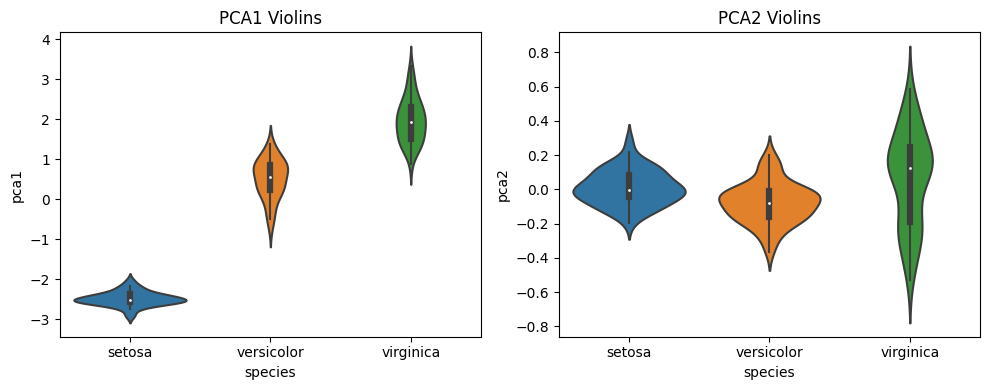

In [18]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 4)
sns.violinplot(x='species', y='pca1', data=df_pca, ax=ax1)
ax1.set(title='PCA1 Violins')
sns.violinplot(x='species', y='pca2', data=df_pca, ax=ax2)
ax2.set(title='PCA2 Violins')
plt.tight_layout()

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
cols=['sepal length in cm', 'sepal width in cm']
lda.fit(df[cols], df['species'])
out_lda = lda.transform(df[cols])
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis=1)

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/data/실습에 사용되는 파일2-20230314/iris.csv"); df.index.name='record'

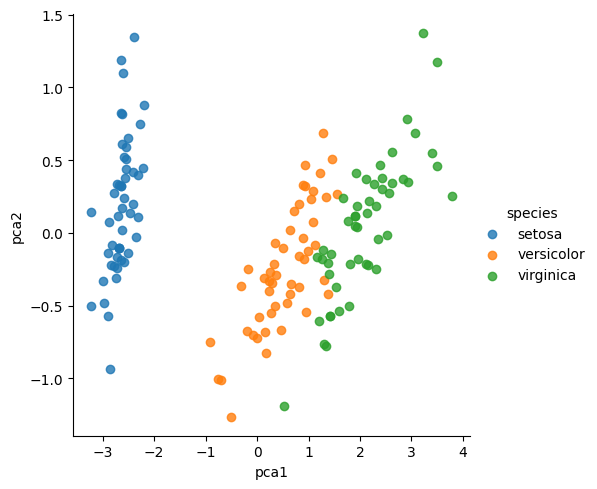

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df[['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm',]])
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)
sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

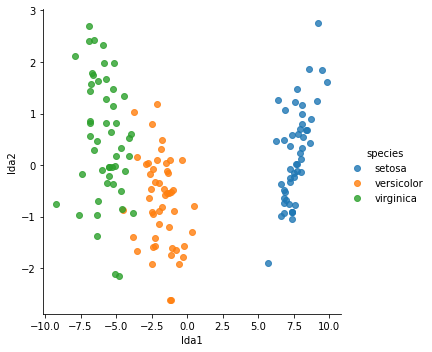

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
cols = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']
lda.fit(df[cols], df['species'])
out_lda = lda.transform(df[cols])
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis =1)
sns.lmplot(x='lda1', y='lda2', hue='species', data=df_lda, fit_reg=False)